# Fetal Health Classification

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress.

CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("fetal_health.csv")
data.sample(8)

baseline value  accelerations  fetal_movement  uterine_contractions  \
716            132.0          0.003           0.005                 0.006   
1543           144.0          0.000           0.000                 0.008   
654            123.0          0.000           0.000                 0.000   
1199           143.0          0.005           0.000                 0.005   
428            121.0          0.012           0.009                 0.001   
448            135.0          0.004           0.003                 0.000   
105            125.0          0.004           0.029                 0.003   
870            136.0          0.008           0.000                 0.007   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
716                 0.000                   0.0                       0.0   
1543                0.000                   0.0                       0.0   
654                 0.000                   0.0                       0.0   
1199                0.000                   0.0                       0.0   
428                 0.000                   0.0                       0.0   
448                 0.000                   0.0                       0.0   
105                 0.004                   0.0                       0.0   
870                 0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
716                              58.0                                   0.5   
1543                             48.0                                   0.6   
654                              71.0                                   0.3   
1199                             44.0                                   1.1   
428                              39.0                                   1.3   
448                              59.0                                   0.5   
105                              22.0                                   2.8   
870                              42.0                                   0.7   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
716                                                23.0       ...   
1543                                                6.0       ...   
654                                                77.0       ...   
1199                                                5.0       ...   
428                                                 0.0       ...   
448                                                13.0       ...   
105                                                 0.0       ...   
870                                                20.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
716           120.0          156.0                        2.0   
1543          129.0          160.0                        1.0   
654           110.0          129.0                        1.0   
1199          128.0          173.0                        4.0   
428           102.0          200.0                        7.0   
448            70.0          165.0                        5.0   
105            56.0          184.0                        5.0   
870           120.0          158.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
716                          0.0           133.0           135.0   
1543                         0.0           148.0           147.0   
654                          0.0           123.0           123.0   
1199                         0.0           147.0           148.0   
428                          1.0           133.0           131.0   
448                          0.0           142.0           141.0   
105                          1.0           125.0           123.0   
870                          1.0           141.0           143.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
716   

In [3]:
data.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
data.tail(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121          137.0          177.0                        4.0   
2122          103.0          169.0                        6.0   
2123          103.0          170.0                        5.0   
2124          103.0          169.0                        6.0   
2125          117.0          159.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                         0.0           153.0           150.0   
2122                         0.0           152.0           148.0   
2123                         0.0           153.0           148.0   
2124                         0.0           152.0           147.0   
2125                         1.0           145.0           143.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121             152.0                 2.0                 0.0           2.0  
2122             151.0                 3.0                 1.0           2.0  
2123             152.0                 4.0                 1.0           2.0  
2124             151.0                 4.0                 1.0           2.0  
2125             145.0                 1.0                 0.0           1.0  

[5 rows x 22 columns]

In [5]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
data.shape

(2126, 22)

In [7]:
df = data.drop_duplicates()
df.shape

(2113, 22)

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [11]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2113.000000           2113.000000               2113.000000   
mean              0.001901              0.000003                  0.000159   
std               0.002966              0.000057                  0.000592   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2113.000000                           2113.000000   
mean                         46.993848                              1.335021   
std                          17.177782                              0.884368   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2113.000000       ...   
mean                                            9.795078       ...   
std                                            18.337073       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                            11.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2113.000000    2113.000000                2113.000000   
mean       93.564600     164.099858                   4.077142   
std        29.562269      17.945175                   2.951664   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   4.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2113.000000     2113.000000     2113.000000   
mean                     0.325603      137.454330      134.599621   
std                      0.707771       16.402026       15.610422   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

## Data Analysis

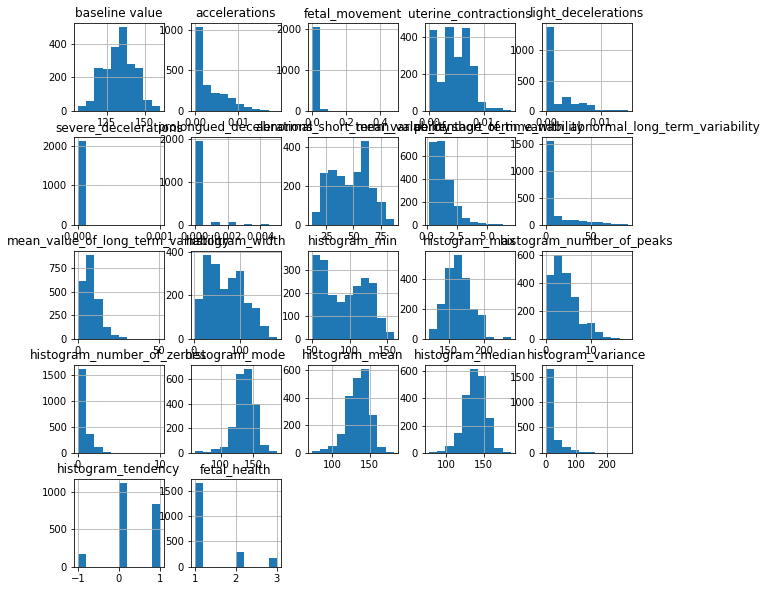

In [12]:
plot = df.hist(figsize=(10,10))

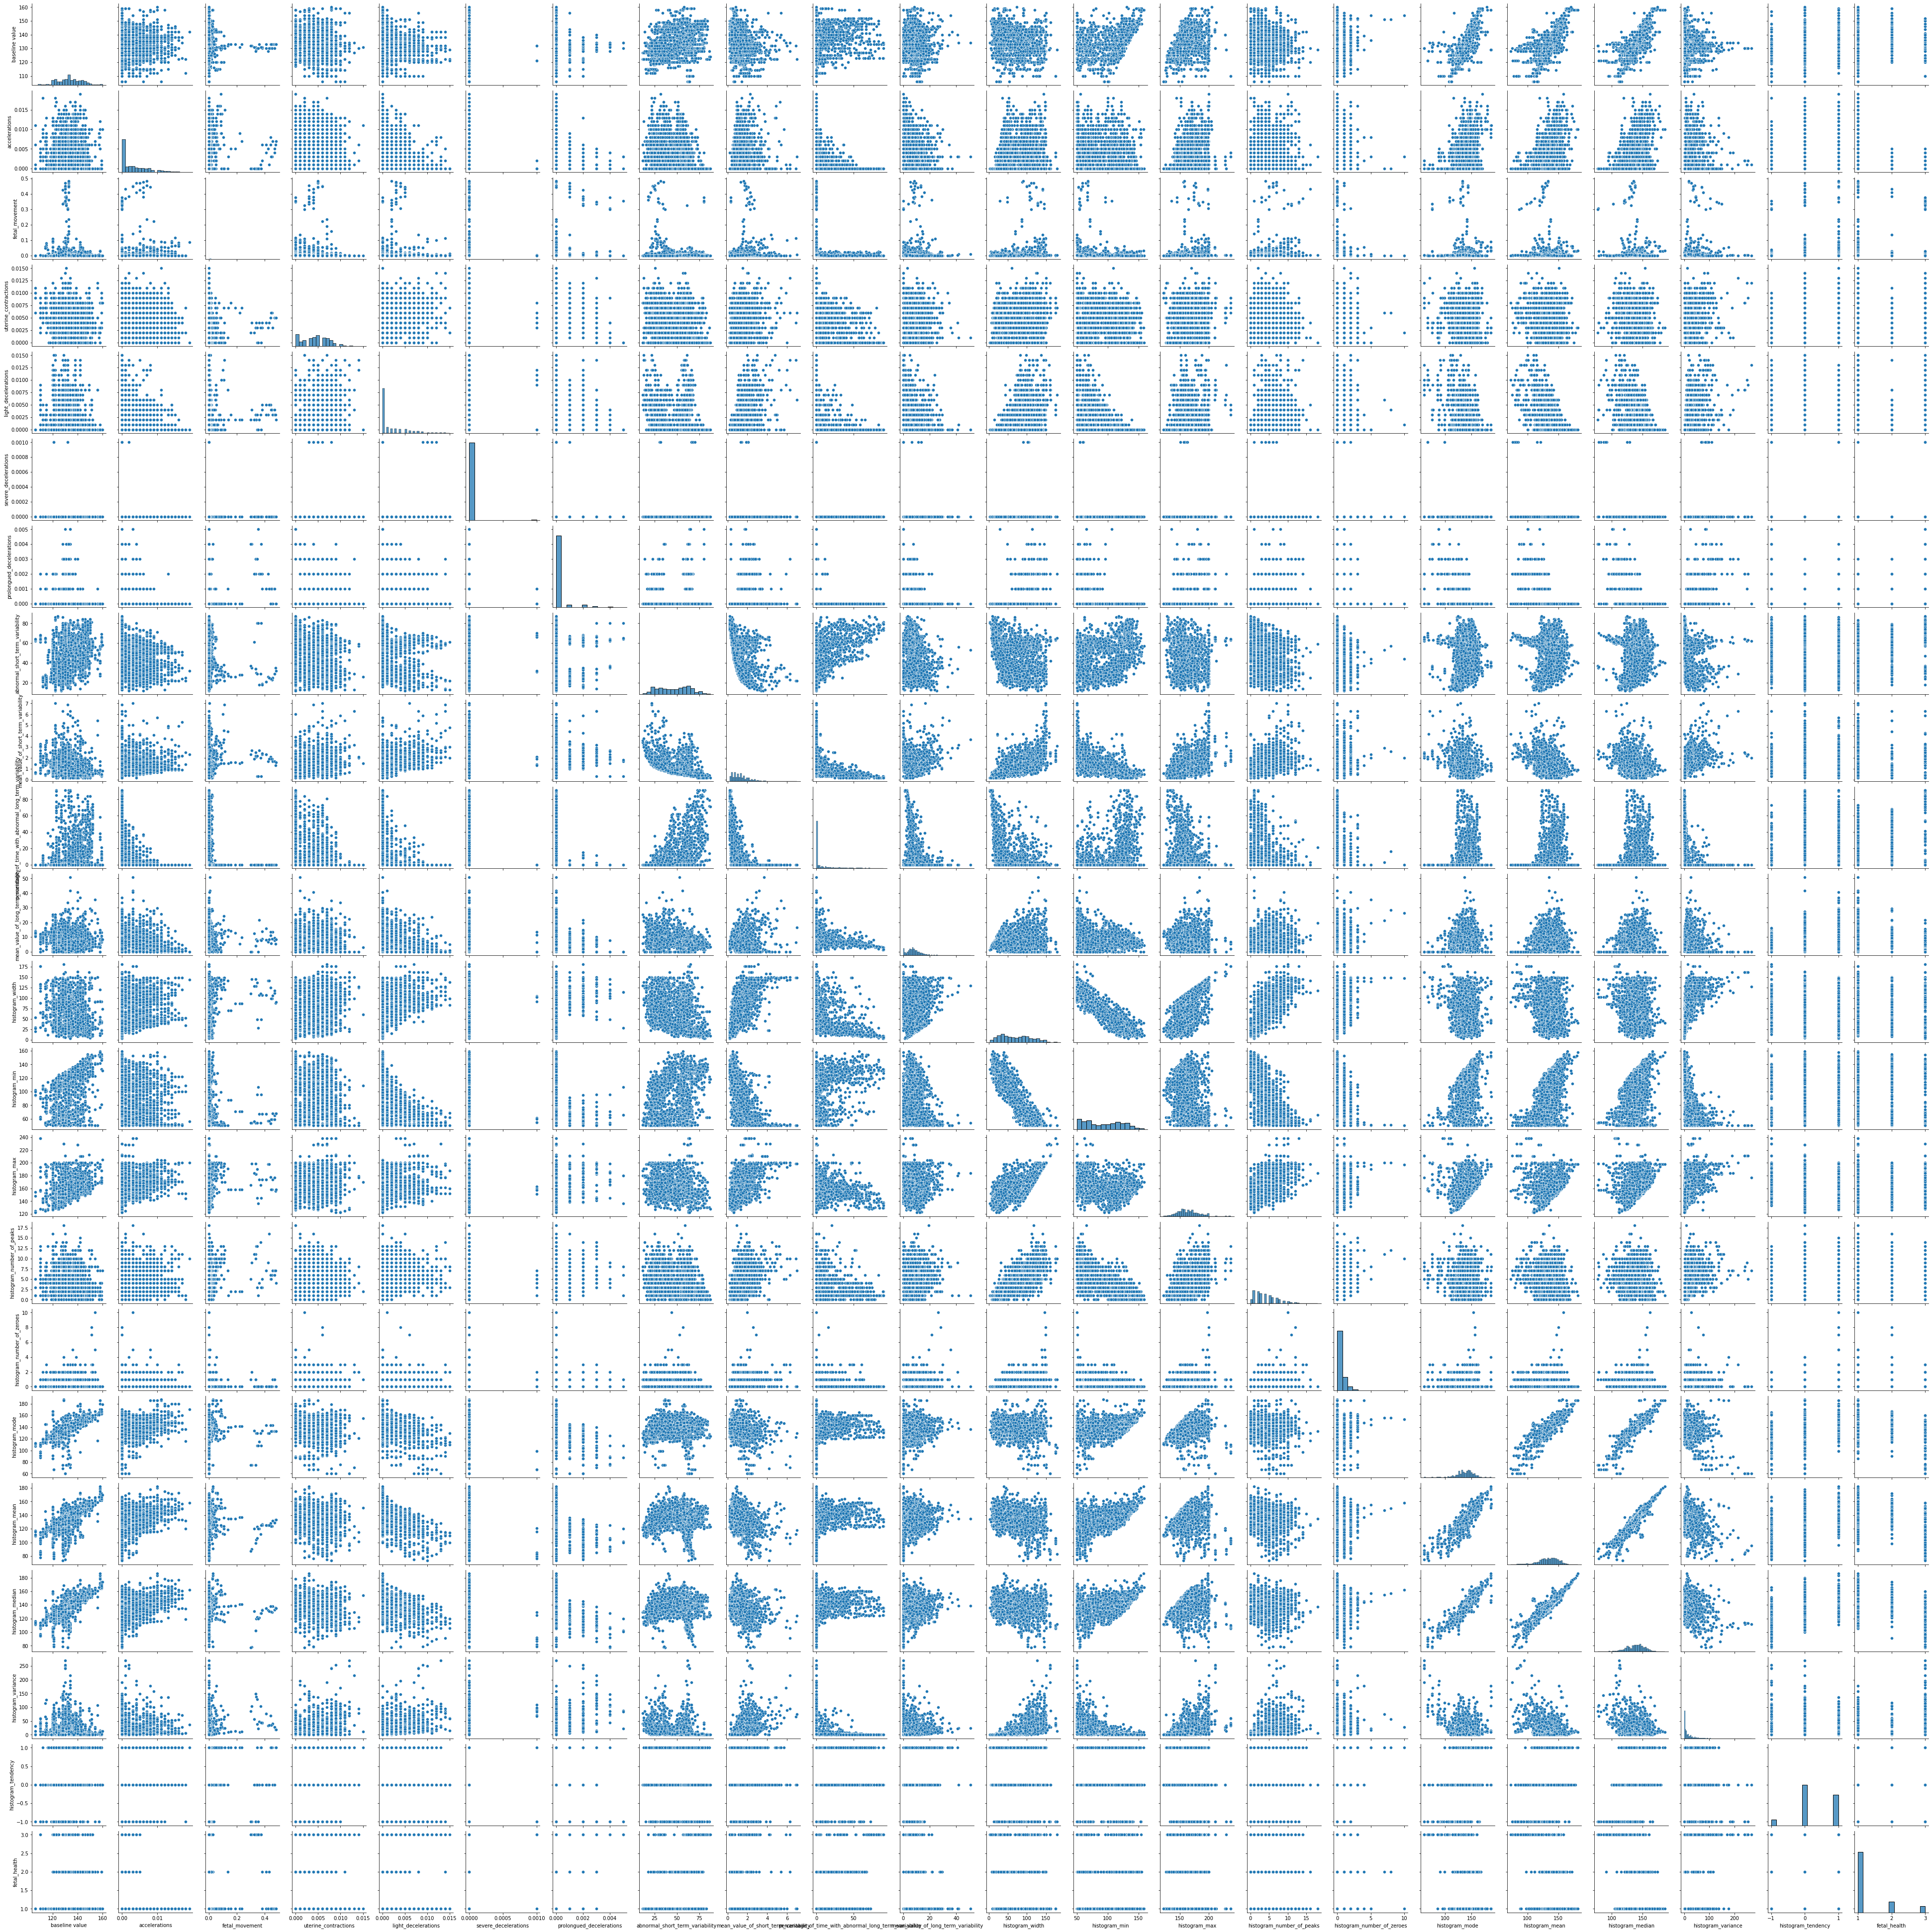

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

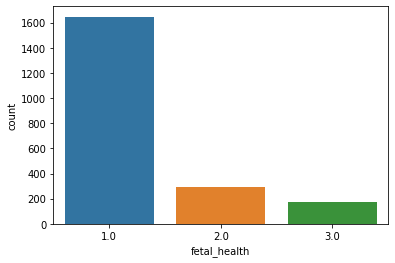

In [14]:
sns.countplot(df["fetal_health"])

This shows that the class is imbalanced.

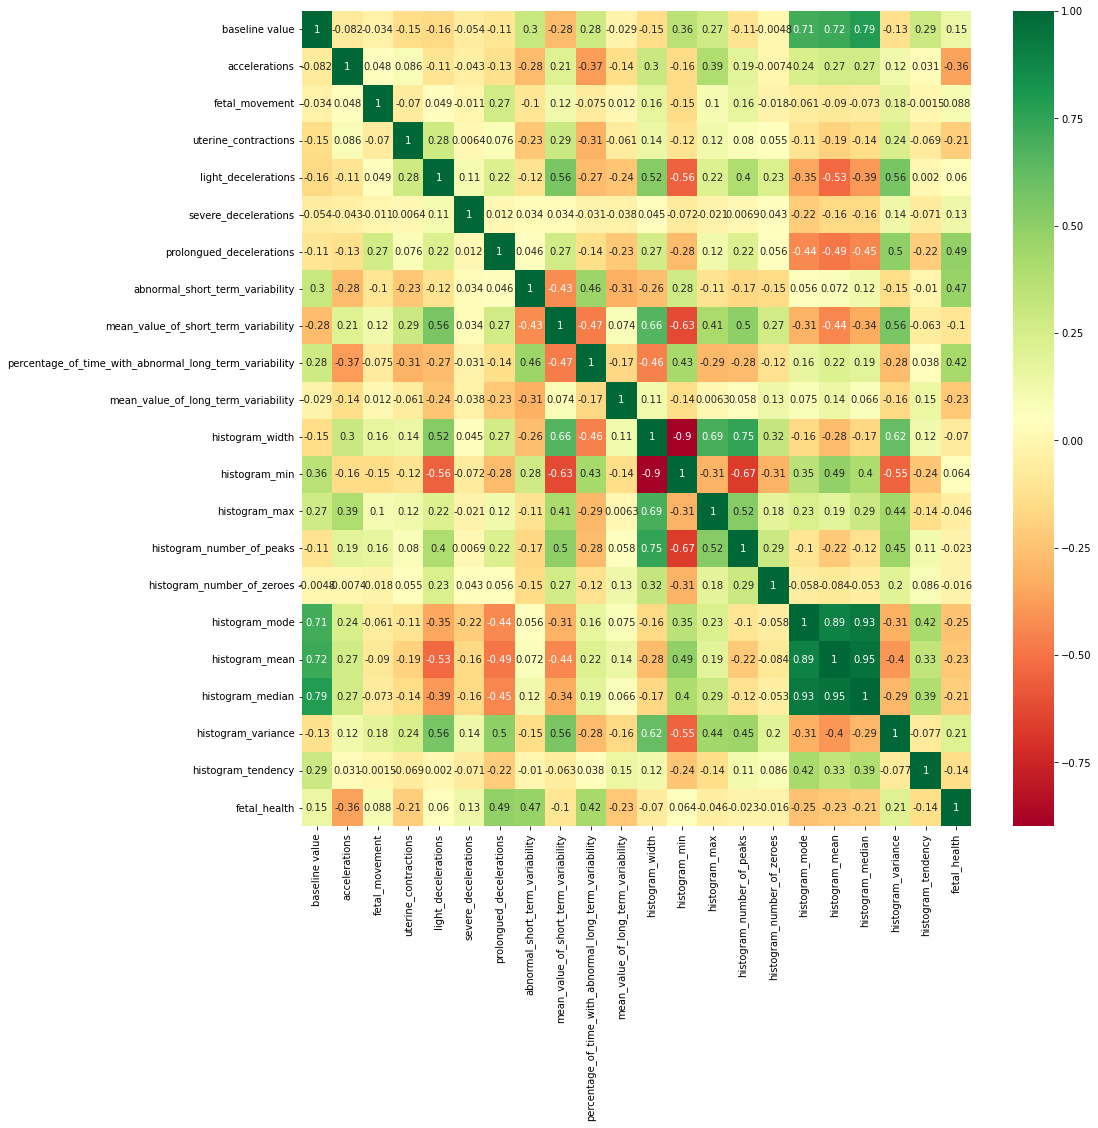

In [15]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(15,15))
ax = sns.heatmap(df[features].corr(), annot=True,cmap="RdYlGn")

## Handling outliers

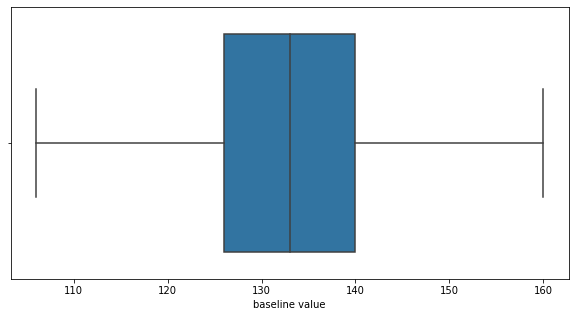

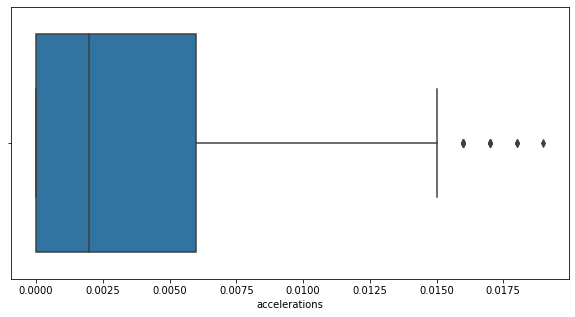

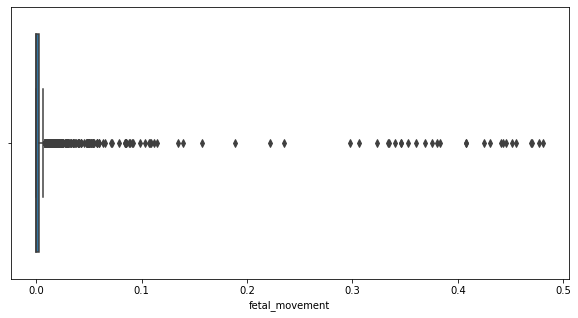

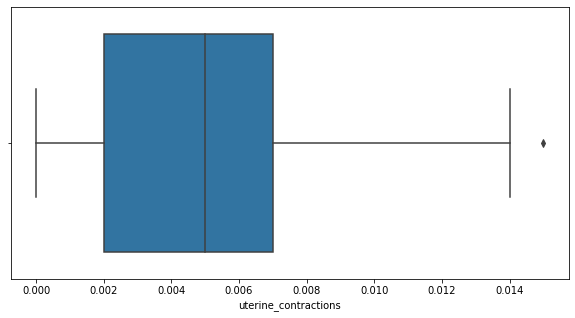

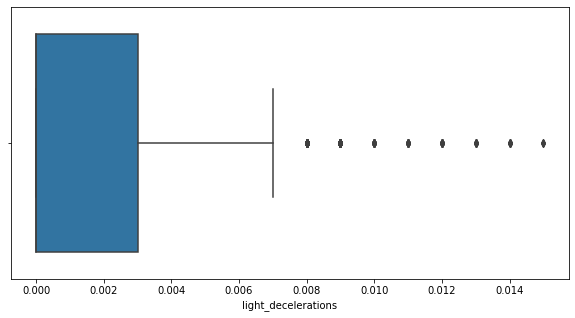

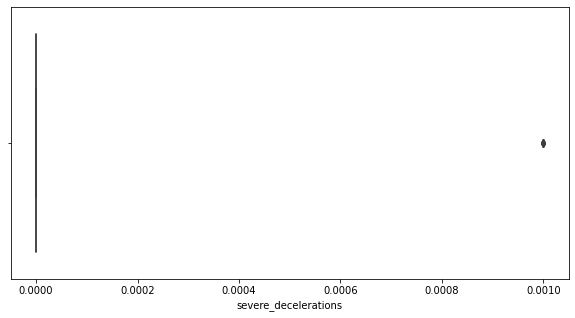

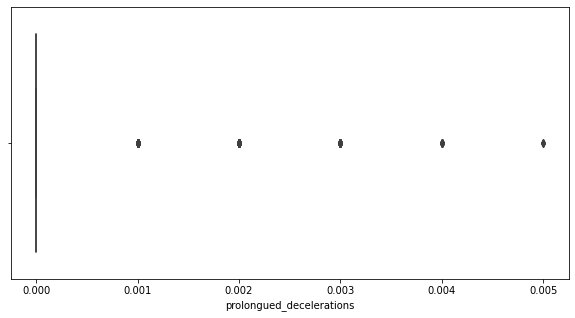

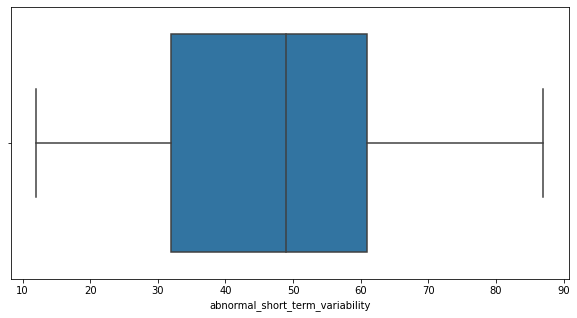

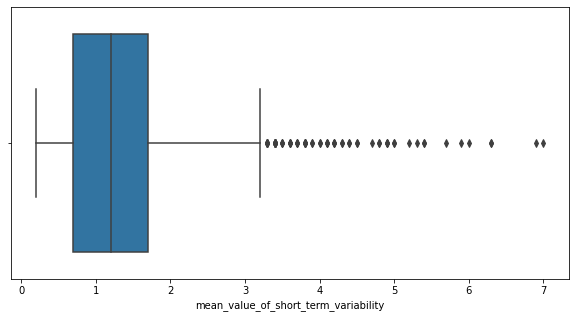

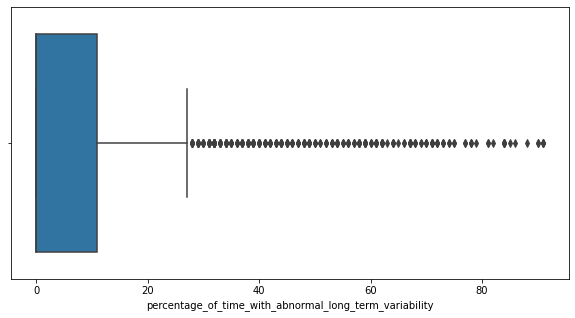

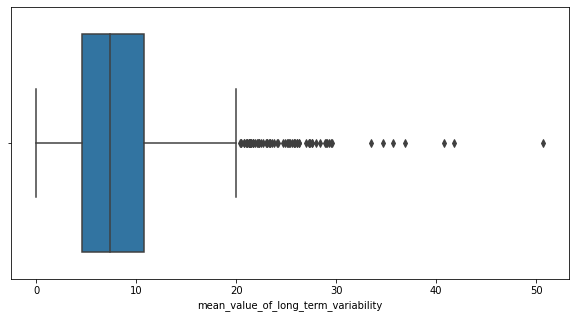

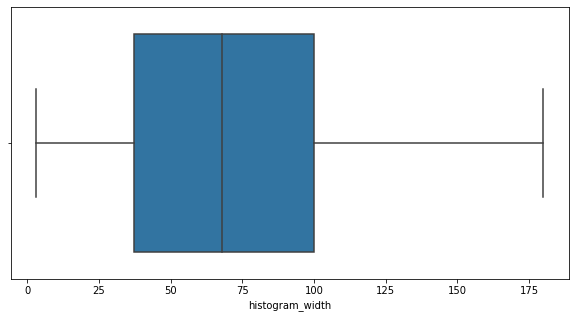

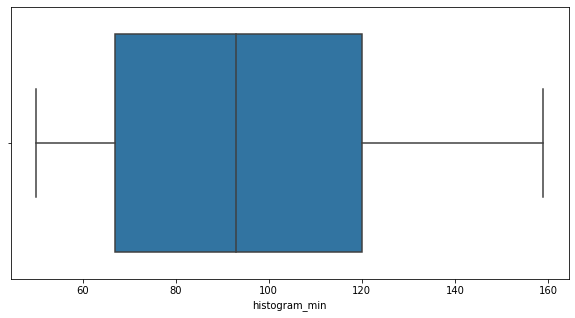

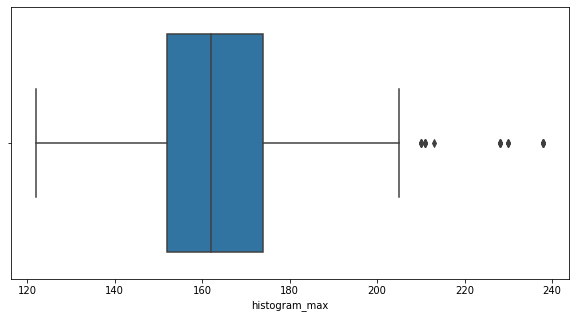

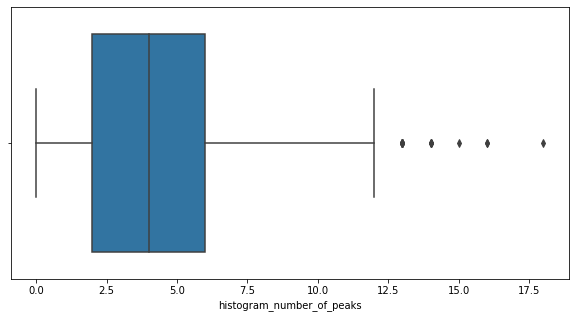

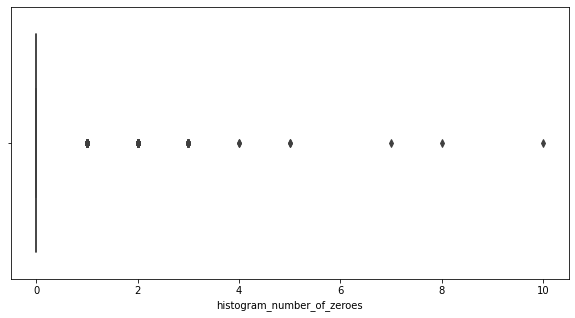

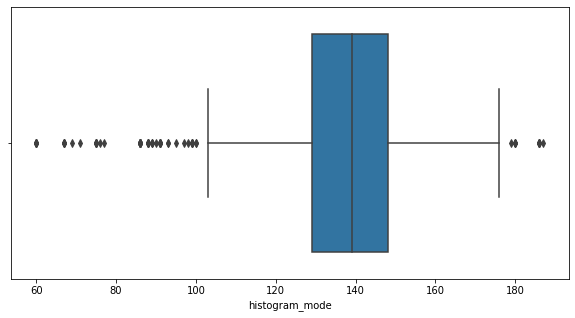

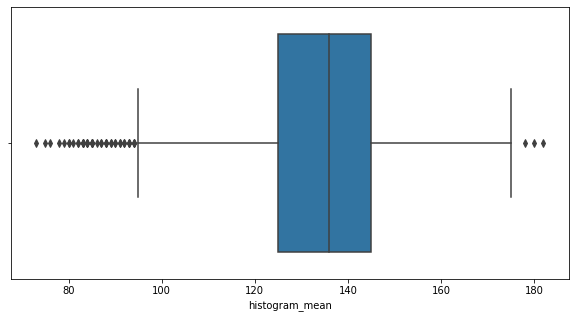

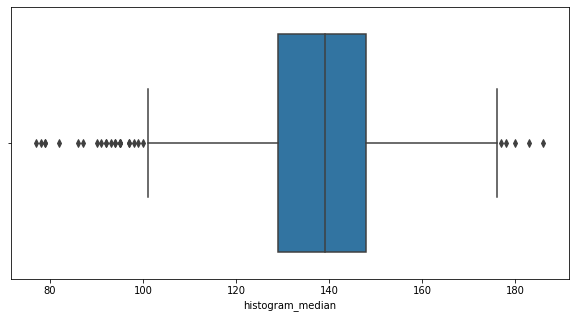

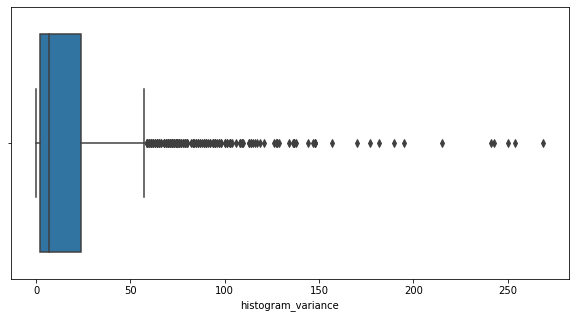

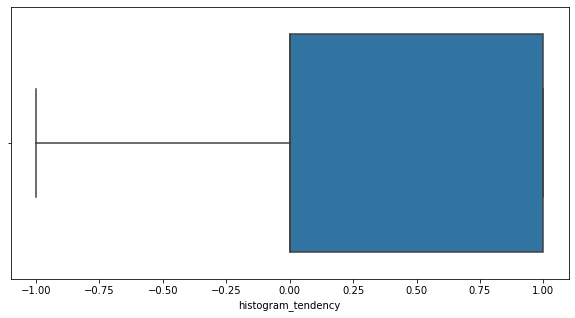

In [16]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

## Train Test Split

In [17]:
y = df["fetal_health"]
X = df.drop(["fetal_health"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("X_train: ", X_train.shape, "y_train: ",y_train.shape)
print("X_test: ", X_test.shape, "y_test: ",y_test.shape)

X_train:  (1690, 21) y_train:  (1690,)
X_test:  (423, 21) y_test:  (423,)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

baseline value  accelerations  fetal_movement  uterine_contractions  \
0          -0.339193       0.724774       -0.202548              0.534158   
1          -1.145716      -0.818529       -0.202548             -1.163974   
2          -1.145716       0.467557       -0.202548              0.534158   
3           1.173037      -0.046877       -0.202548              0.534158   
4           0.870591      -0.304095        0.930291             -1.163974   
...              ...            ...             ...                   ...   
1685       -0.137562       0.981991       -0.202548              1.892664   
1686       -1.145716      -0.818529       -0.202548             -0.484721   
1687       -1.145716       0.210340       -0.202548              0.194532   
1688        0.467330      -0.304095       -0.202548              0.873785   
1689        0.265699       0.981991       -0.202548              0.194532   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0               -0.634225             -0.064492                 -0.271626   
1               -0.634225             -0.064492                 -0.271626   
2               -0.634225             -0.064492                 -0.271626   
3               -0.634225             -0.064492                 -0.271626   
4                1.722207             -0.064492                 -0.271626   
...                   ...                   ...                       ...   
1685             3.068740             -0.064492                 -0.271626   
1686            -0.634225             -0.064492                 -0.271626   
1687             0.712308             -0.064492                 -0.271626   
1688             1.048941             -0.064492                 -0.271626   
1689            -0.634225             -0.064492                 -0.271626   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           -0.532355                             -0.363964   
1                           -1.224684                             -0.028638   
2                           -0.878520                             -0.252189   
3                            0.044585                             -0.699290   
4                            0.967689                              2.989294   
...                               ...                                   ...   
1685                         0.506137                              1.647991   
1686                        -1.513154                              0.977339   
1687                        -1.455460                              0.418463   
1688                        -0.878520                             -0.252189   
1689                        -0.301579                             -0.699290   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                             -0.547954       ...   
1                                             -0.335425       ...   
2                                              0.089633       ...   
3                                             -0.441690       ...   
4                                             -0.547954       ...   
...                                                 ...       ...   
1685                                          -0.547954       ...   
1686                                          -0.547954       ...   
1687                                          -0.547954       ...   
1688                                           0.302162       ...   
1689                                           0.514692       ...   

      histogram_width  histogram_min  histogram_max  \
0           -0.421879       0.255185      -0.495031   
1           -1.012920       0.390007      -1.558270   
2           -0.113510      -0.385221      -0.886751   
3           -0.807340       1.300057       0.400329   
4            1.890890      -0.924509       2.582769   
...               ...            ...            

In [21]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled

baseline value  accelerations  fetal_movement  uterine_contractions  \
0          1.072222      -0.304095        0.007237             -0.824348   
1         -0.843270       0.467557       -0.160591              0.534158   
2         -1.347346       2.525295       -0.076677             -0.484721   
3          0.870591      -0.818529       -0.076677             -1.503601   
4          1.173037      -0.818529       -0.202548             -0.824348   
..              ...            ...             ...                   ...   
418        0.164884      -0.304095       -0.202548             -1.503601   
419       -0.540824       0.981991       -0.202548             -0.145095   
420        1.072222      -0.818529       -0.139613             -1.503601   
421        1.777929      -0.818529       -0.202548              0.534158   
422        0.668961       0.724774       -0.139613             -0.484721   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
0              -0.634225             -0.064492                 -0.271626   
1               2.395474             -0.064492                 -0.271626   
2              -0.634225             -0.064492                 -0.271626   
3              -0.634225             -0.064492                 -0.271626   
4              -0.634225             -0.064492                 -0.271626   
..                   ...                   ...                       ...   
418            -0.634225             -0.064492                 -0.271626   
419             1.048941             -0.064492                 -0.271626   
420            -0.634225             -0.064492                 -0.271626   
421             0.712308             -0.064492                 -0.271626   
422            -0.634225             -0.064492                 -0.271626   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           1.660018                             -0.811065   
1                           0.736913                             -0.028638   
2                          -0.416967                             -0.028638   
3                           0.794607                             -0.699290   
4                           0.102279                             -0.811065   
..                               ...                                   ...   
418                         0.909995                             -0.922840   
419                        -0.243885                              1.312665   
420                         0.794607                             -1.034616   
421                         0.563831                              1.424440   
422                         0.506137                              0.194912   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                            -0.547954       ...   
1                                            -0.547954       ...   
2                                            -0.547954       ...   
3                                             2.214925       ...   
4                                            -0.388557       ...   
..                                                 ...       ...   
418                                          -0.122896       ...   
419                                          -0.547954       ...   
420                                          -0.122896       ...   
421                                           0.302162       ...   
422                                          -0.494822       ...   

     histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0          -0.396181       1.064118       0.903969                  -0.691373   
1           0.683111      -0.890804       0.008609                   0.675201   
2           0.503229      -0.890804      -0.383111                   0.333557   
3           0.246254      -0.789687      -0.774831                   2.725062   
4          -1.090012

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_resampled))
print(sorted(Counter(y_resampled).items()))

Original dataset shape Counter({1.0: 1305, 2.0: 238, 3.0: 147})
Resample dataset shape Counter({1.0: 1305, 3.0: 1305, 2.0: 1305})
[(1.0, 1305), (2.0, 1305), (3.0, 1305)]


In [23]:
X_resampled

baseline value  accelerations  fetal_movement  uterine_contractions  \
0          -0.339193       0.724774       -0.202548              0.534158   
1          -1.145716      -0.818529       -0.202548             -1.163974   
2          -1.145716       0.467557       -0.202548              0.534158   
3           1.173037      -0.046877       -0.202548              0.534158   
4           0.870591      -0.304095        0.930291             -1.163974   
...              ...            ...             ...                   ...   
3910       -0.036747      -0.818529       -0.202548             -1.503601   
3911       -0.036747      -0.818529       -0.181570              0.534158   
3912       -0.440008      -0.818529       -0.181570              0.534158   
3913       -0.238378      -0.818529        7.664390             -1.503601   
3914       -0.036747      -0.818529       -0.202548              0.873785   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0               -0.634225             -0.064492                 -0.271626   
1               -0.634225             -0.064492                 -0.271626   
2               -0.634225             -0.064492                 -0.271626   
3               -0.634225             -0.064492                 -0.271626   
4                1.722207             -0.064492                 -0.271626   
...                   ...                   ...                       ...   
3910            -0.634225             -0.064492                 -0.271626   
3911            -0.297592             -0.064492                  3.054810   
3912             1.385574             -0.064492                  3.054810   
3913            -0.634225             -0.064492                  6.381247   
3914            -0.297592             -0.064492                  4.718029   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           -0.532355                             -0.363964   
1                           -1.224684                             -0.028638   
2                           -0.878520                             -0.252189   
3                            0.044585                             -0.699290   
4                            0.967689                              2.989294   
...                               ...                                   ...   
3910                         1.602324                             -1.258166   
3911                         0.736913                              1.983317   
3912                         1.083077                              2.095092   
3913                         1.890794                             -1.146391   
3914                         0.736913                              2.095092   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                             -0.547954       ...   
1                                             -0.335425       ...   
2                                              0.089633       ...   
3                                             -0.441690       ...   
4                                             -0.547954       ...   
...                                                 ...       ...   
3910                                           4.287084       ...   
3911                                          -0.547954       ...   
3912                                          -0.547954       ...   
3913                                          -0.547954       ...   
3914                                          -0.547954       ...   

      histogram_width  histogram_min  histogram_max  \
0           -0.421879       0.255185      -0.495031   
1           -1.012920       0.390007      -1.558270   
2           -0.113510      -0.385221      -0.886751   
3           -0.807340       1.300057       0.400329   
4            1.890890      -0.924509       2.582769   
...               ...            ...            

In [24]:
y_resampled

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3910    3.0
3911    3.0
3912    3.0
3913    3.0
3914    3.0
Name: fetal_health, Length: 3915, dtype: float64

## Model building and Evaluation

Training accuracy:  0.8602809706257982
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002830BA26490>
Classification Report               precision    recall  f1-score   support

         1.0       1.00      0.87      0.93       341
         2.0       0.54      0.85      0.66        54
         3.0       0.65      0.93      0.76        28

    accuracy                           0.87       423
   macro avg       0.73      0.88      0.79       423
weighted avg       0.92      0.87      0.88       423



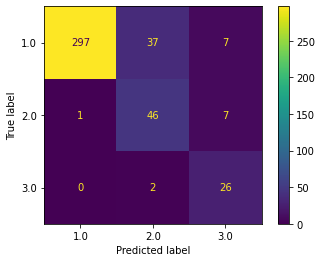

In [25]:
## model 1

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
print('Training accuracy: ', model.score(X_resampled, y_resampled))  

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import plot_confusion_matrix, classification_report

print("Plot confusion matrix",plot_confusion_matrix(model,X_test_scaled,y_test))

print("Classification Report",classification_report(y_test,y_pred))

Training accuracy:  0.9997445721583652
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002830BA23E80>
Classification Report               precision    recall  f1-score   support

         1.0       1.00      0.87      0.93       341
         2.0       0.54      0.85      0.66        54
         3.0       0.65      0.93      0.76        28

    accuracy                           0.87       423
   macro avg       0.73      0.88      0.79       423
weighted avg       0.92      0.87      0.88       423



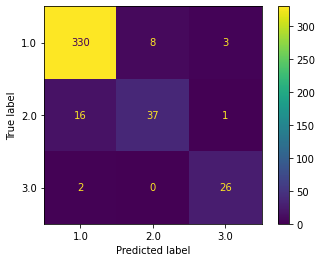

In [26]:
## model 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_2.score(X_resampled, y_resampled))

y_predict = model.predict(X_test_scaled)

print("Plot confusion matrix",plot_confusion_matrix(model_2,X_test_scaled,y_test))

print("Classification Report",classification_report(y_test,y_predict))

Training accuracy:  0.9997445721583652
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002830CABAA60>
Classification Report               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       341
         2.0       0.89      0.87      0.88        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.97      0.97      0.97       423



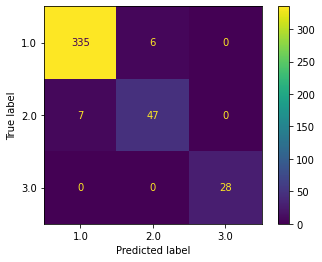

In [27]:
## model 3 

from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_3.score(X_resampled, y_resampled))

y_predic = model_3.predict(X_test_scaled)

print("Plot confusion matrix",plot_confusion_matrix(model_3,X_test_scaled,y_test))

print("Classification Report",classification_report(y_test,y_predic))

Training accuracy:  0.9869731800766284
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002830CC32EB0>
Classification report               precision    recall  f1-score   support

         1.0       0.98      0.94      0.96       341
         2.0       0.73      0.89      0.80        54
         3.0       0.97      1.00      0.98        28

    accuracy                           0.94       423
   macro avg       0.89      0.94      0.92       423
weighted avg       0.95      0.94      0.94       423



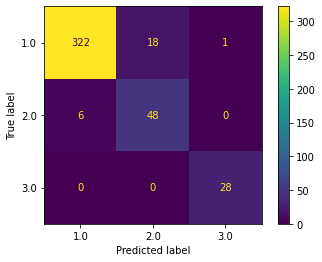

In [28]:
## model 4

from sklearn.ensemble import GradientBoostingClassifier
model_4 = GradientBoostingClassifier()
model_4.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_4.score(X_resampled, y_resampled))

y_prediction = model_4.predict(X_test_scaled)

print("Plot confusion matrix",plot_confusion_matrix(model_4,X_test_scaled,y_test))

print("Classification report", classification_report(y_test,y_prediction))

RandomForest model has 97% accuracy